In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load csv file

df = pd.read_csv("Myntra Fasion Clothing.csv", low_memory = False)

In [3]:
# Display the first 5 rows of the dataset

df.head(5)

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [4]:
# Check shape of data

df.shape

(526564, 13)

In [5]:
# Check duplicates

df.duplicated().sum()

0

In [6]:
# Show dataset summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526564 entries, 0 to 526563
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   URL                    526564 non-null  object 
 1   Product_id             526564 non-null  int64  
 2   BrandName              526564 non-null  object 
 3   Category               526564 non-null  object 
 4   Individual_category    526564 non-null  object 
 5   category_by_Gender     526564 non-null  object 
 6   Description            526564 non-null  object 
 7   DiscountPrice (in Rs)  333406 non-null  float64
 8   OriginalPrice (in Rs)  526564 non-null  float64
 9   DiscountOffer          452258 non-null  object 
 10  SizeOption             526564 non-null  object 
 11  Ratings                190412 non-null  float64
 12  Reviews                190412 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ MB


In [7]:
#  Check for Null values

df.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64

In [8]:
# Summarize Data to Check for Outliers & Trends

df.describe().round(1)

,Product_id,DiscountPrice (in Rs),OriginalPrice (in Rs),Ratings,Reviews
count,526564.0,333406.0,526564.0,190412.0,190412.0
mean,15069387.0,1237.4,2414.1,4.1,62.0
std,3225709.7,1052.1,1917.0,0.5,125.7
min,27399.0,127.0,99.0,1.0,0.0
25%,13880530.0,659.0,1299.0,3.9,8.0
50%,15971057.0,952.0,1999.0,4.2,18.0
75%,17347414.5,1469.0,2899.0,4.4,52.0
max,18464352.0,27996.0,90000.0,5.0,999.0


In [9]:
# Rename columns

df.columns = ['url', 'product_id', 'brand_name', 'category', 'individual_category', 
              'category_by_gender', 'description', 'total_price', 'original_price', 
              'discount_offer', 'size_option', 'ratings', 'reviews']

In [10]:
# Standardize Text

df['brand_name'] = df['brand_name'].str.title()

In [11]:
# Standardize Text

df['individual_category'] = df['individual_category'].str.title()

In [12]:
# Fill NaN with mean value

df['ratings'] = df['ratings'].fillna(df['ratings'].mean()).round(1)

In [13]:
# Fill NaN with mean value

df['reviews'] = df['reviews'].fillna(df['reviews'].mean()).round(1)

In [14]:
# Clean & Standardize Discount Data

df['discount_offer'] = df['discount_offer'].astype(str).str.strip()

In [15]:
# Extract Percentage-Based & Rupee-Based Discounts

df['dis_per'] = df['discount_offer'].str.extract(r'(\d+)\s*%').astype(float)

df['dis_rupees'] = df['discount_offer'].str.extract(r'Rs\.\s*(\d+)').astype(float)

In [16]:
# Handle Missing Discounts by Replacing NaN with 0

df[['dis_per', 'dis_rupees']] = df[['dis_per', 'dis_rupees']].fillna(0)

In [17]:
# Convert Rupee Discounts to Percentage for Uniformity

df['rupee_dis_as_per'] = (df['dis_rupees'] / df['original_price']) * 100

# Fill NaN with 0 for missing values

df['rupee_dis_as_per'] = df['rupee_dis_as_per'].fillna(0)

In [18]:
# Create a Final Discount Column

df['discount_percent'] = df[['dis_per', 'rupee_dis_as_per']].max(axis = 1)

In [19]:
# Calculate Final Price After Discount

df['total_price'] = df['original_price'] * (1 - (df['discount_percent'] / 100))

In [20]:
# Calculate Amount Saved

df['saving_price'] = df['original_price'] - df['total_price']

In [21]:
# Summarize Data to re-Check for Outliers & Trends

df.describe().round(1)

,product_id,total_price,original_price,ratings,reviews,dis_per,dis_rupees,rupee_dis_as_per,discount_percent,saving_price
count,526564.0,526564.0,526564.0,526564.0,526564.0,526564.0,526564.0,526564.0,526564.0,526564.0
mean,15069387.0,1308.6,2414.1,4.1,62.0,40.2,44.0,1.8,42.0,1105.5
std,3225709.7,1209.4,1917.0,0.3,75.6,25.1,387.2,9.7,24.2,1229.1
min,27399.0,99.0,99.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,13880530.0,659.4,1299.0,4.1,40.0,20.0,0.0,0.0,24.0,339.0
50%,15971057.0,967.5,1999.0,4.1,62.0,50.0,0.0,0.0,50.0,829.5
75%,17347414.5,1536.5,2899.0,4.1,62.0,60.0,0.0,0.0,60.0,1455.4
max,18464352.0,90000.0,90000.0,5.0,999.0,90.0,36001.0,89.0,90.0,36001.0


In [22]:
# Categorize Products Based on Original Price

def categorize_original_price(price):
    if price <= 1299:
        return "Budget"
    elif 1300 <= price <= 2899:
        return "Mid-Range"
    else:
        return "Premium"

In [23]:
# Apply categorize_original_price function

df['original_price_category'] = df['original_price'].apply(categorize_original_price)

In [24]:
# Categorize Products Based on Final Price (After Discounts)

def categorize_total_price(price):
    if price <= 659:
        return "Budget"
    elif 660 <= price <= 1536:
        return "Mid-Range"
    else:
        return "Premium"

In [25]:
# Apply categorize_total_price function

df['total_price_category'] = df['total_price'].apply(categorize_total_price)

In [26]:
# All Columns 

df.columns

Index(['url', 'product_id', 'brand_name', 'category', 'individual_category',
       'category_by_gender', 'description', 'total_price', 'original_price',
       'discount_offer', 'size_option', 'ratings', 'reviews', 'dis_per',
       'dis_rupees', 'rupee_dis_as_per', 'discount_percent', 'saving_price',
       'original_price_category', 'total_price_category'],
      dtype='object')

In [27]:
#  Drop Unnecessary Columns After Processing

df.drop(['url', 'discount_offer', 'dis_per', 'dis_rupees', 'rupee_dis_as_per'], axis=1, inplace=True)

In [28]:
# Reorder Columns for a Structured E-Commerce Format

df = df[['product_id', 'brand_name', 'category', 'individual_category',
         'category_by_gender', 'size_option', 'description', 'original_price', 
         'discount_percent', 'total_price', 'saving_price', 'original_price_category', 
         'total_price_category', 'ratings', 'reviews']]

In [29]:
# Display the final fully cleaned and structured dataset

df.head()

,product_id,brand_name,category,individual_category,category_by_gender,size_option,description,original_price,discount_percent,total_price,saving_price,original_price_category,total_price_category,ratings,reviews
0,2296012,Roadster,Bottom Wear,Jeans,Men,"28, 30, 32, 34, 36",roadster men navy blue slim fit mid rise clean...,1499.0,45.0,824.45,674.55,Mid-Range,Mid-Range,3.9,999.0
1,13780156,Locomotive,Bottom Wear,Track-Pants,Men,"S, M, L, XL",locomotive men black white solid slim fit tra...,1149.0,55.0,517.05,631.95,Budget,Budget,4.0,999.0
2,11895958,Roadster,Topwear,Shirts,Men,"38, 40, 42, 44, 46, 48",roadster men navy white black geometric print...,1399.0,55.0,629.55,769.45,Mid-Range,Budget,4.3,999.0
3,4335679,Zivame,Lingerie & Sleep Wear,Shapewear,Women,"S, M, L, XL, XXL",zivame women black saree shapewear zi3023core0...,1295.0,31.0,893.55,401.45,Budget,Mid-Range,4.2,999.0
4,11690882,Roadster,Western,Tshirts,Women,"XS, S, M, L, XL",roadster women white solid v neck pure cotton ...,599.0,35.0,389.35,209.65,Budget,Budget,4.2,999.0


In [30]:
df.to_csv("cleaned_data.csv", index=False)

Average Rating by Brand

# Data Visualization: Insights 

### Q1: What does the product catalog look like across genders?

Text(0.5, 1.0, 'Product Catalog Distribution by Gender')

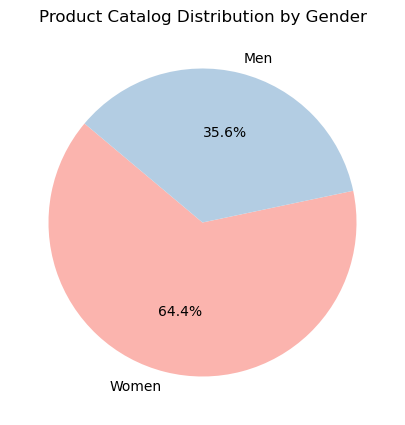

In [31]:
# Value counts
gender_counts = df['category_by_gender'].value_counts()

# Plot
plt.figure(figsize=(6,5))
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Product Catalog Distribution by Gender')

**🎯 Key Insight:**
* The product catalog is significantly skewed towards women's products, with 64.4% of all items targeting women and 35.6% targeting men.

**Interpretation:** 
* This indicates a strategic focus on the women's fashion market, suggesting higher demand, broader product variety, or a stronger marketing emphasis towards female customers.

### Q2: Which product categories dominate the catalog in terms of number of products?

Text(0, 0.5, 'Category')

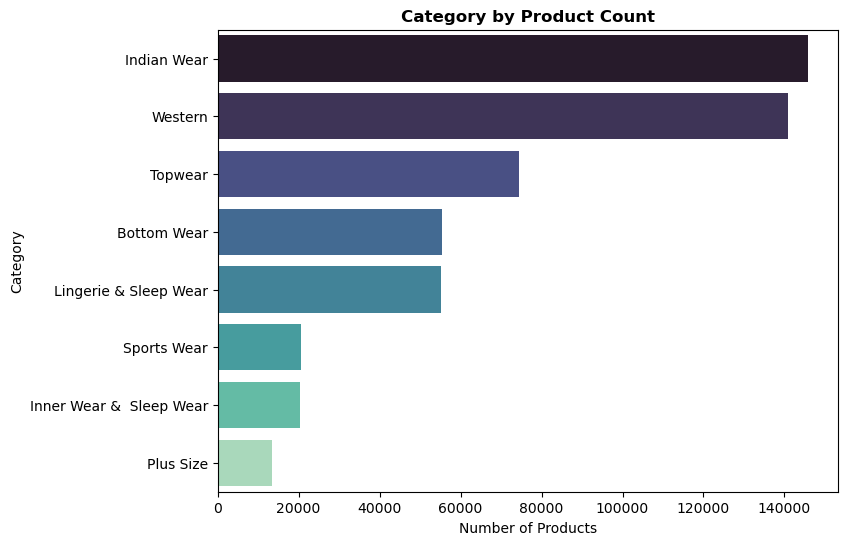

In [32]:
# Prepare the data
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Plot 
plt.figure(figsize=(8, 6))
sns.barplot(
    data=category_counts,
    x='count',
    y='category',
    hue='category',            
    palette='mako',
    legend=False               
)

plt.title('Category by Product Count',  weight='bold')
plt.xlabel('Number of Products')
plt.ylabel('Category')

**🎯 Key Insight:**
* Indian Wear and Western Wear dominate the product catalog, each contributing an extremely large volume compared to other categories.

* Indian Wear is the leading category, followed closely by Western Wear, while categories like Plus Size and Inner Wear & Sleep Wear have relatively lower product counts.

**Interpretation:**
* This suggests Myntra's catalog is highly focused on traditional and western apparel, aligning with a diverse range of customer fashion preferences.

### Q3: Which brands have the most products listed?

Text(0, 0.5, 'Brand')

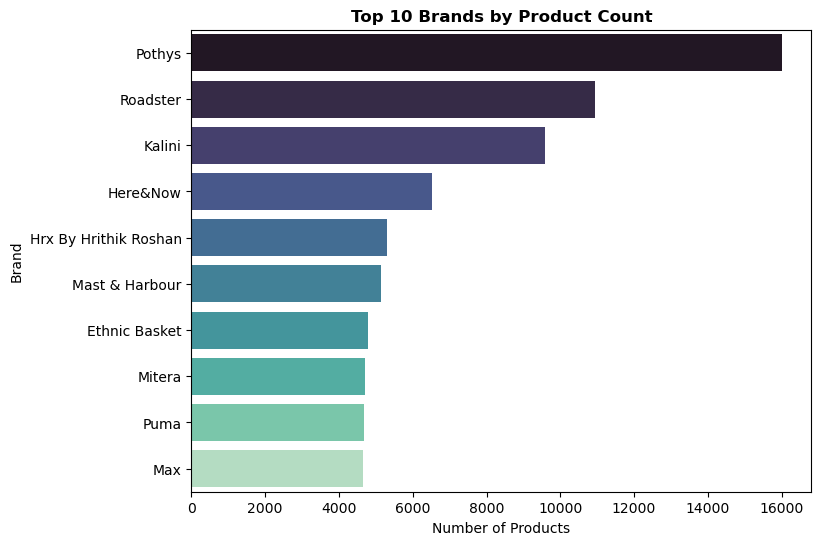

In [33]:
# Prepare top N brands
top_brands = df['brand_name'].value_counts().head(10).reset_index()
top_brands.columns = ['brand_name', 'count']

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_brands,
    x='count',
    y='brand_name',
    hue='brand_name',
    palette= 'mako',
    legend=False
)

plt.title('Top 10 Brands by Product Count', weight='bold')
plt.xlabel('Number of Products')
plt.ylabel('Brand')

**🎯 Key Insight:**
* Pothys clearly dominates the product catalog with the highest number of products, followed by Roadster and Kalini.

* These three brands have a substantial lead over others like Here&Now, HRX by Hrithik Roshan, and Mast & Harbour.

* All brands in the Top 10 list show strong product availability, but the gap between the top 3 and the rest is quite notable.

**Interpretation:**
* The catalog strategy includes both ethnic and contemporary brands, indicating an effort to appeal to a wide demographic — from traditional shoppers to modern, urban customers.

* A strong ethnic representation suggests the importance of cultural and festive wear in the product offering.

* Casual brands balance the assortment, catering to daily and youth-centric fashion needs.

### Q4: Which brands have the best customer satisfaction?

(0.0, 5.0)

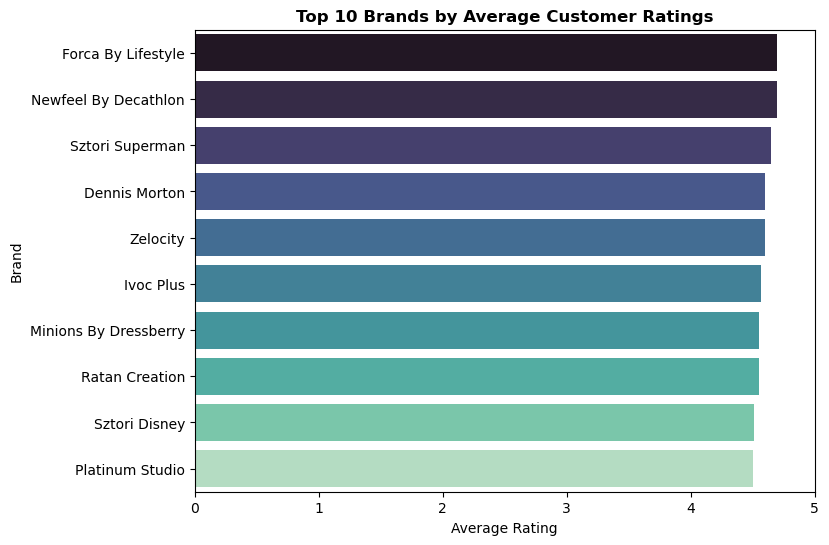

In [34]:
# Prepare the data
top_rated_brands = (
    df.groupby('brand_name')['ratings']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index())

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_rated_brands,
    x='ratings',
    y='brand_name',
    hue='brand_name',
    palette= 'mako',
    legend=False  # Single Myntra color (clean look)
)

# Style
plt.title('Top 10 Brands by Average Customer Ratings',  weight='bold')
plt.xlabel('Average Rating')
plt.ylabel('Brand')
plt.xlim(0, 5)  # Ratings are typically between 0-5

**🎯 Key Insight:**
* Forca By Lifestyle and Newfeel By Decathlon are leading the customer satisfaction game with the highest average ratings close to 4.5.

* All top 10 brands have very high customer ratings, indicating strong product quality, satisfaction, and positive brand perception among buyers.

**Interpretation:**
* Even brands that are not market leaders in product count (like Sztori Superman, Dennis Morton) are doing exceptionally well in customer satisfaction, opening up opportunities for loyalty programs, premium positioning, and marketing leverage.

### Q5: What Are the Most and Least Expensive Categories?

Text(0, 0.5, 'Product Category')

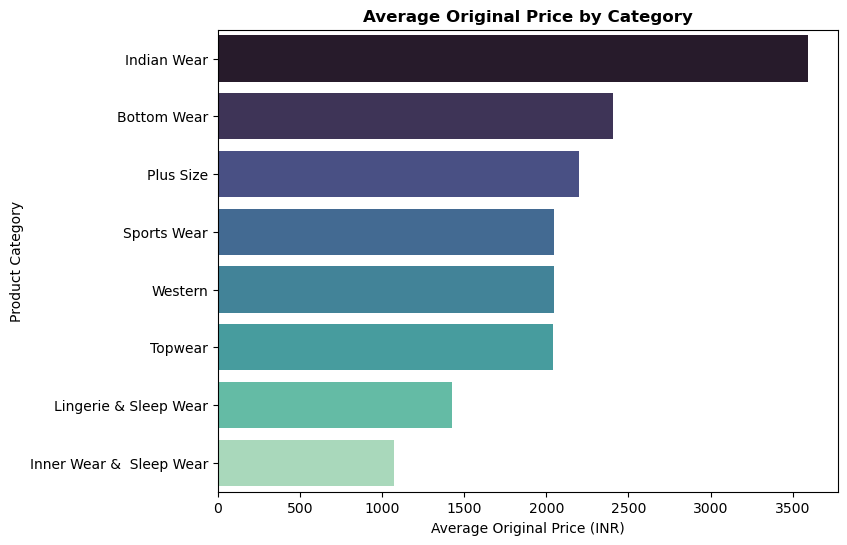

In [35]:
# Prepare data
avg_price_per_category = (
    df.groupby('category')['original_price']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=avg_price_per_category,
    x='original_price',
    y='category',
    hue='category',
    palette= 'mako',
    legend=False
)

# Style
plt.title('Average Original Price by Category', weight='bold')
plt.xlabel('Average Original Price (INR)')
plt.ylabel('Product Category')

**🎯 Key Insight:**
* Indian Wear dominates with the highest average original price (~₹3600), significantly higher than all other categories.

* Bottom Wear and Plus Size products follow, priced higher than Sports Wear, Western, and Topwear.

* Inner Wear & Sleepwear has the lowest average original price, reflecting a more affordable, high-frequency purchase category.

**Interpretation:**
* Indian Wear can be positioned as a premium/luxury segment.

* Categories like Lingerie & Sleepwear, Inner Wear & Sleepwear could be strategically marketed for volume sales rather than high-margin sales.

### Q6: How Are Prices Spread Overall?

Text(0, 0.5, 'Number of Products')

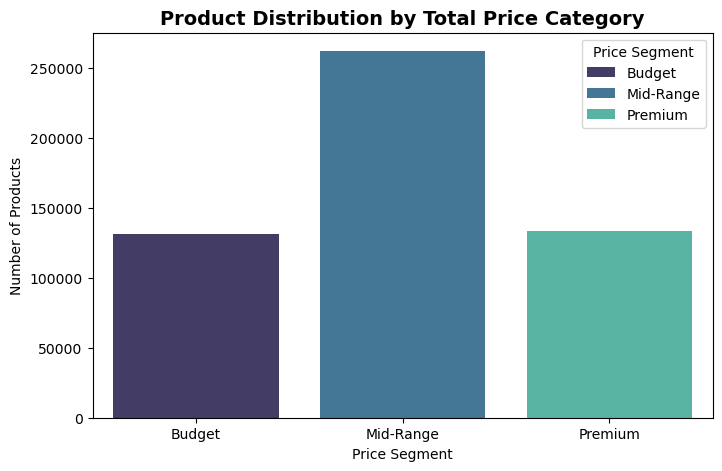

In [36]:
# Prepare data
price_segment_counts = df['total_price_category'].value_counts().reset_index()
price_segment_counts.columns = ['Price Segment', 'Count']
price_segment_counts = price_segment_counts.sort_values(by='Price Segment')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_segment_counts,
    x='Price Segment',
    y='Count',
    hue='Price Segment',
    palette= 'mako',
    legend=True  # Clean, consistent Myntra theme
)

# Style
plt.title('Product Distribution by Total Price Category', fontsize=14, weight='bold')
plt.xlabel('Price Segment')
plt.ylabel('Number of Products')

**🎯 Key Insight:**
* The Mid-Range segment overwhelmingly dominates the market, with more than double the number of products compared to Budget and Premium segments.

* Interestingly, Budget and Premium categories have almost the same number of products, but each less than half of the Mid-Range inventory.

**Interpretation:** 
* Mid-Range pricing is the sweet spot for most customers and brands.

* Premium offerings are selectively fewer, implying a niche high-value market.

* Budget category holds a significant presence but isn't the primary focus compared to mid-range.

### Q7: Who Prefers What? Gender vs Category

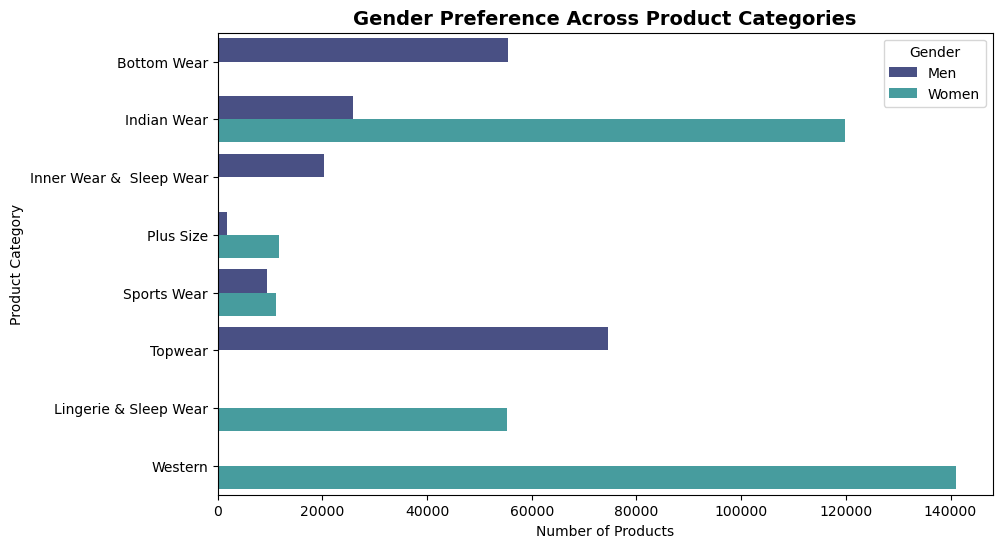

In [37]:
# Prepare data
gender_category_counts = (
    df.groupby(['category_by_gender', 'category'])
    .size()
    .reset_index(name='count')
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=gender_category_counts,
    x='count',
    y='category',
    hue='category_by_gender',
    palette='mako'
)

# Style
plt.title('Gender Preference Across Product Categories', fontsize=14, weight='bold')
plt.xlabel('Number of Products')
plt.ylabel('Product Category')
plt.legend(title='Gender')

**🎯 Key Insight:** 
* Women dominate in most product categories, especially in Indian Wear, Western Wear, and Lingerie & Sleep Wear.

* Men show strong preference in categories like Bottom Wear and Topwear.

* Sports Wear and Inner Wear have a relatively balanced distribution between genders.

**Interpretation:** 
* Women's categories have significantly higher product counts, indicating a strong market skew.

* Indian and Western wear have particularly massive gaps favoring women-focused products.

* Brands targeting men could explore opportunities in Topwear and Bottom Wear.

* Balanced categories like Sports Wear offer room for unisex or gender-neutral marketing.

### Q8: What are the most popular product categories overall?

Text(0, 0.5, 'Product Category')

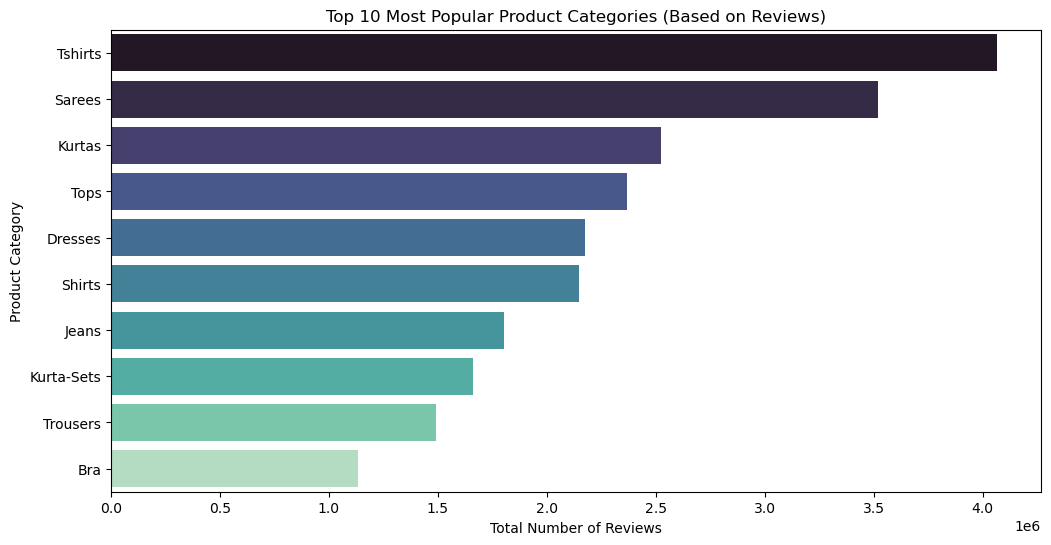

In [38]:
# Group by individual category and sum reviews
category_popularity = df.groupby('individual_category')['reviews'].sum().sort_values(ascending=False)

# Take top 10
top_10_categories = category_popularity.head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    x=top_10_categories.values,
    y=top_10_categories.index,
    hue=top_10_categories.index,
    palette='mako',   # ✅ future-proofing (hue assigned)
    legend=False
)

# Style
plt.title('Top 10 Most Popular Product Categories (Based on Reviews)')
plt.xlabel('Total Number of Reviews')
plt.ylabel('Product Category')

**🎯 Key Insight:** 
* Tshirts and Sarees receive the highest number of customer reviews, followed by Kurtas, Tops, and Dresses.

* There is strong engagement across both casual (Tshirts, Jeans) and traditional (Sarees, Kurtas) categories.

**Interpretation:**
* T-shirts top the list, reflecting their broad appeal and everyday usage.

* Sarees and Kurtas highlight the strong demand for ethnic/traditional apparel online.

* High review volume signals not only popularity but also potential for upselling, bundling, and loyalty programs.

### Q9:  What are the top 3 subcategories under each category?

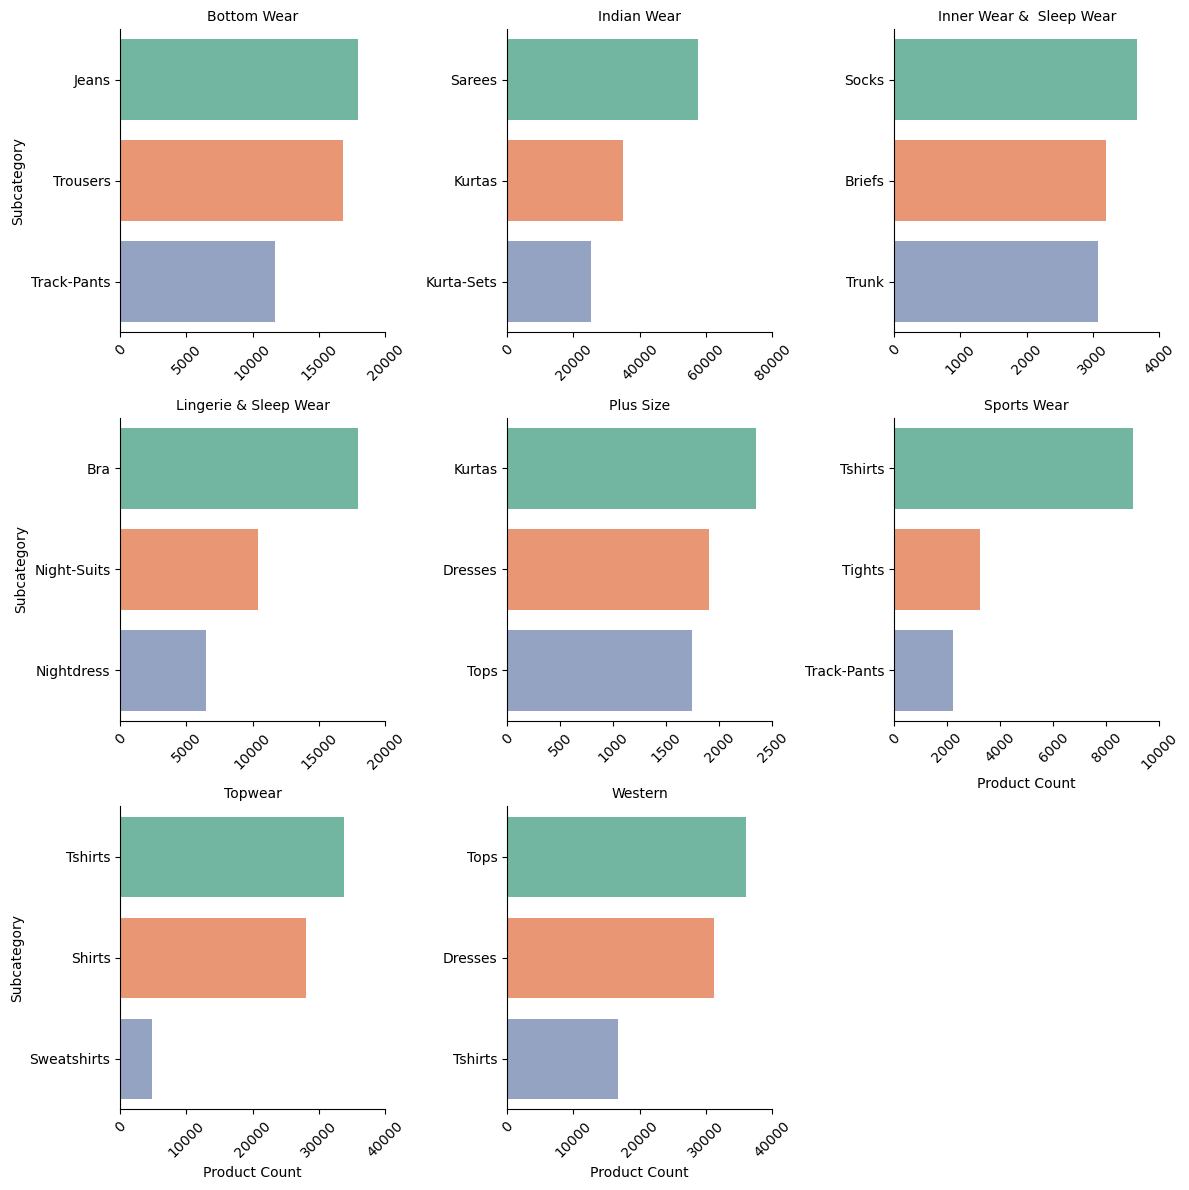

In [39]:
# Find top 3 subcategories within each category
top_subcategories = (
    df.groupby(['category', 'individual_category'])
    .size()
    .reset_index(name='product_count')
)

# For each category, keep top 3 subcategories
top_subcategories = (
    top_subcategories
    .sort_values(['category', 'product_count'], ascending=[True, False])
    .groupby('category')
    .head(3)
)

# Plot using FacetGrid
g = sns.FacetGrid(
    top_subcategories,
    col="category",
    col_wrap=3,
    sharex=False,
    sharey=False,
    height=4
)

g.map_dataframe(
    sns.barplot,
    x="product_count",
    y="individual_category",
    palette="Set2",
    hue="individual_category",
    legend=False  # ✅ future-proofed
)

# Style
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Product Count", "Subcategory")
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()


**🎯 Key Insight:** 
* Each main product category is heavily driven by a few dominant subcategories — e.g., Sarees in Indian Wear, Jeans in Bottom Wear, and Tops in Western Wear.

**Interpretation:**
* Subcategories like Sarees, Jeans, Tops, and Tshirts drive most inventory and likely revenue.

* Tailoring promotions, inventory stocking, and merchandising around these top subcategories can maximize returns.

* Lesser subcategories can be strategically grown or repositioned based on the performance of these leaders.

### Q10: Are discounts helping improve customer ratings?

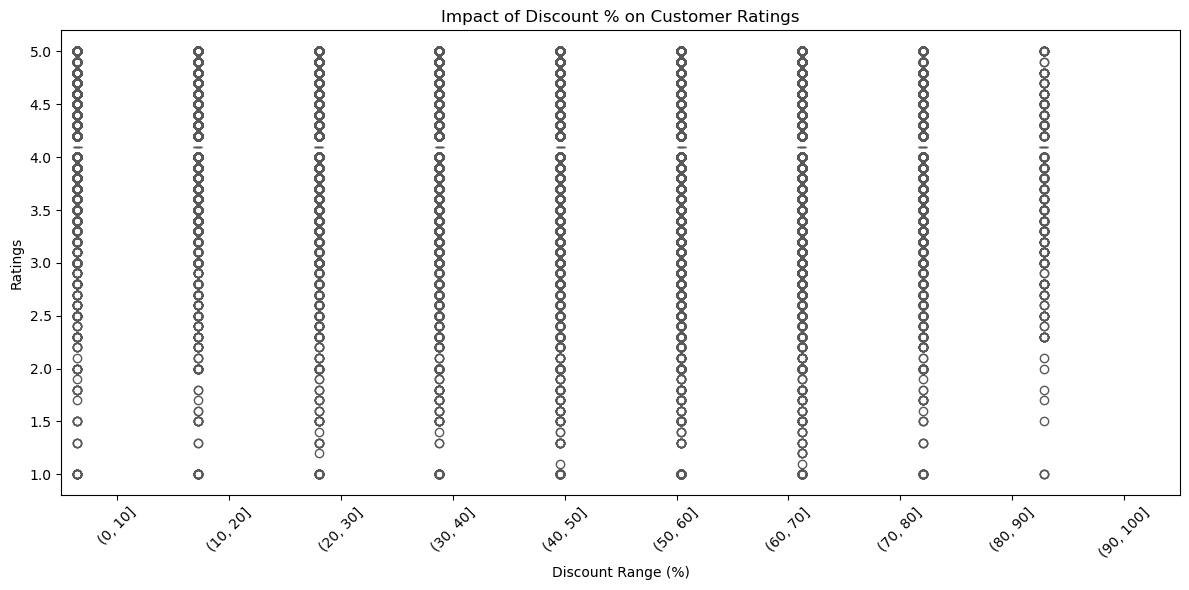

In [40]:
# To make analysis meaningful, we can create discount bins
discount_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df['discount_range'] = pd.cut(df['discount_percent'], bins=discount_bins)

# Plot
plt.figure(figsize=(12,6))
sns.boxplot(
    x='discount_range',
    y='ratings',
    data=df,
    palette='Set2',
    hue='discount_range',  # ✅ future-proofed
    legend=False
)

# Style
plt.title('Impact of Discount % on Customer Ratings')
plt.xlabel('Discount Range (%)')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.tight_layout()

**🎯 Key Insight:** 
* There is no clear relationship between higher discounts and better customer ratings.
  
* Ratings remain fairly consistent across all discount ranges, typically clustering around 4.0 regardless of the discount offered.

**Interpretation:**
* Discounts do not significantly influence customer satisfaction in terms of ratings.

* Product quality, fit, style, and overall experience likely matter much more to customers than price reductions alone.

* Brands should not rely solely on discounting strategies to drive better customer feedback — product quality must remain a priority.